In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
bitcoin_news_lag1 = pd.read_csv(
    "../Data/bitcoin_news_sentiment_daily_lag1.csv", index_col=0
)
BB_sentiment_lag1 = pd.read_csv("../Data/BB_sentiment_lag1.csv", index_col=0)
btc_direction = pd.read_csv("../Data/btc_direction.csv", index_col=0)
btc_magnitude = pd.read_csv("../Data/btc_magnitude.csv", index_col=0)
coinbase_news_lag1 = pd.read_csv(
    "../Data/coinbase_news_sentiment_daily_lag1.csv", index_col=0
)
non_sentiment_lag1 = pd.read_csv("../Data/features_lag1.csv", index_col=0)
gg_trend = pd.read_csv("../Data/google_trends_signal_daily.csv", index_col=0)

In [62]:
bitcoin_news_lag1.columns = [col + "_bitcoin" for col in bitcoin_news_lag1.columns]
bitcoin_news_lag1

,positive_count_bitcoin,negative_count_bitcoin,neutral_count_bitcoin,positive_avg_score_bitcoin,negative_avg_score_bitcoin,neutral_avg_score_bitcoin,total_news_count_bitcoin,total_news_score_bitcoin,signal_bitcoin
date_dt,,,,,,,,,
2021-04-15,10.0,2.0,10.0,0.907243,0.959677,0.849137,22.0,7.153077,0.666667
2021-04-16,6.0,10.0,7.0,0.623001,0.895473,0.726584,23.0,-5.216729,-0.250000
2021-04-17,1.0,2.0,3.0,0.725935,0.804262,0.818327,6.0,-0.882590,-0.333333
2021-04-19,2.0,6.0,1.0,0.886130,0.962285,0.899825,9.0,-4.001451,-0.500000
2021-04-20,3.0,5.0,2.0,0.867508,0.785641,0.786232,10.0,-1.325679,-0.250000
...,...,...,...,...,...,...,...,...,...
2024-03-09,3.0,1.0,0.0,0.774210,0.975991,0.000000,4.0,1.346641,0.500000
2024-03-12,9.0,0.0,1.0,0.798569,0.000000,0.871973,10.0,7.187121,1.000000
2024-03-13,3.0,0.0,1.0,0.821627,0.000000,0.901766,4.0,2.464880,1.000000


In [63]:
BB_sentiment_lag1

,TWITTER_SENTIMENT_DAILY_AVG,TWITTER_PUBLICATION_COUNT,TWITTER_NEG_SENTIMENT_COUNT,TWITTER_POS_SENTIMENT_COUNT,TWITTER_SENTIMENT_DAILY_MAX,TWITTER_NEUTRAL_SENTIMENT_CNT,TWITTER_SENTIMENT_DAILY_MIN,NEWS_SENTIMENT_DAILY_AVG
date_dt,,,,,,,,
2021-04-02,0.0032,10.0,1.0,1.0,0.1068,14.0,-0.1068,-0.6321
2021-04-03,0.0019,174.0,2.0,8.0,0.1068,169.0,-0.1068,0.0005
2021-04-04,0.0019,174.0,2.0,8.0,0.1068,169.0,-0.1068,0.0005
2021-04-05,0.0019,174.0,2.0,8.0,0.1068,169.0,-0.1068,0.0005
2021-04-06,0.0025,41.0,1.0,2.0,0.1070,34.0,0.0000,0.0000
...,...,...,...,...,...,...,...,...
2024-03-28,-0.0049,502.0,12.0,7.0,0.4438,145.0,-0.1830,0.0113
2024-03-29,-0.1393,955.0,148.0,22.0,0.4438,348.0,-0.1830,-0.5112
2024-03-30,-0.0236,470.0,22.0,8.0,0.4438,128.0,-0.1830,-0.0477


In [64]:
btc_direction

,Direction
date_dt,
2014-09-18,0
2014-09-19,0
2014-09-20,1
2014-09-21,0
2014-09-22,1
...,...
2024-03-28,1
2024-03-29,0
2024-03-30,0


In [65]:
btc_magnitude

,magnitude
date_dt,
2014-09-18,5
2014-09-19,5
2014-09-20,6
2014-09-21,5
2014-09-22,6
...,...
2024-03-31,10
2024-04-01,1
2024-04-02,1


In [66]:
coinbase_news_lag1.columns = [col + "_coinbase" for col in coinbase_news_lag1.columns]
coinbase_news_lag1

,positive_count_coinbase,negative_count_coinbase,neutral_count_coinbase,positive_avg_score_coinbase,negative_avg_score_coinbase,neutral_avg_score_coinbase,total_news_count_coinbase,total_news_score_coinbase,signal_coinbase
date_dt,,,,,,,,,
2021-04-14,1.0,0.0,2.0,0.757015,0.000000,0.798267,3.0,0.757015,1.000000
2021-04-15,44.0,23.0,94.0,0.786364,0.817363,0.884039,161.0,15.800687,0.313433
2021-04-16,51.0,28.0,73.0,0.823400,0.890134,0.858108,152.0,17.069669,0.291139
2021-04-17,14.0,12.0,44.0,0.794744,0.798550,0.832263,70.0,1.543818,0.076923
2021-04-18,3.0,2.0,9.0,0.662382,0.733936,0.782948,14.0,0.519273,0.200000
...,...,...,...,...,...,...,...,...,...
2024-03-13,7.0,2.0,18.0,0.814736,0.759975,0.912939,27.0,4.183200,0.555556
2024-03-14,2.0,4.0,18.0,0.818522,0.771731,0.851901,24.0,-1.449878,-0.333333
2024-03-15,5.0,3.0,5.0,0.833427,0.977488,0.903085,13.0,1.234667,0.250000


In [67]:
non_sentiment_lag1

,Open,High,Low,Close,Adj Close,Volume,close_open,Daily Return,cumulative_return,30D_Moving_STD,...,DTB3_lag1,DTB3_lag2,T5YIE_lag1,T5YIE_lag2,S&P500_Close_lag1,S&P500_Close_lag2,VIX_Close_lag1,VIX_Close_lag2,S&P_Return_lag1,S&P_Return_lag2
date_dt,,,,,,,,,,,,,,,,,,,,,
2021-04-15,63523.753906,64863.097656,61554.796875,63109.695312,63109.695312,7.745178e+10,-414.058594,0.003237,0.003237,3795.270489,...,0.02,0.02,2.56,2.56,4124.660156,4124.660156,16.99,16.99,0.011094,0.011094
2021-04-16,63075.195312,63821.671875,62208.964844,63314.011719,63314.011719,6.095438e+10,238.816406,0.003237,0.003237,3795.270489,...,0.02,0.02,2.56,2.56,4124.660156,4124.660156,16.99,16.99,0.011094,0.011094
2021-04-17,63258.503906,63594.722656,60222.531250,61572.789062,61572.789062,8.429301e+10,-1685.714844,-0.027501,-0.024353,3795.270489,...,0.02,0.02,2.55,2.56,4170.419922,4124.660156,16.57,16.99,0.011094,0.011094
2021-04-18,61529.921875,62572.175781,60361.351562,60683.820312,60683.820312,6.613876e+10,-846.101562,-0.014438,-0.038439,3795.270489,...,0.02,0.02,2.57,2.55,4185.470215,4170.419922,16.25,16.57,0.003609,0.011094
2021-04-19,60701.886719,61057.457031,52829.535156,56216.183594,56216.183594,9.746887e+10,-4485.703125,-0.073622,-0.109231,3795.270489,...,0.02,0.02,2.57,2.57,4185.470215,4185.470215,16.25,16.25,0.000000,0.003609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-30,70744.796875,70913.093750,69076.656250,69892.828125,69892.828125,2.523085e+10,-851.968750,-0.012045,0.107482,3319.982750,...,5.23,5.22,2.38,2.37,5254.350098,5248.490234,13.01,12.78,0.001116,0.008631
2024-03-31,69893.445312,70355.492188,69601.062500,69645.304688,69645.304688,1.713024e+10,-248.140625,-0.003541,0.103560,3137.874526,...,5.23,5.23,2.38,2.38,5254.350098,5254.350098,13.01,13.01,0.000000,0.001116
2024-04-01,69647.781250,71377.781250,69624.867188,71333.648438,71333.648438,2.005094e+10,1685.867188,0.024242,0.130312,3054.432327,...,5.23,5.23,2.38,2.38,5254.350098,5254.350098,13.01,13.01,0.000000,0.000000


In [68]:
gg_trend.index.name = "date_dt"
gg_trend.rename(columns={"signal": "gg_trend"}, inplace=True)
gg_trend

,gg_trend
date_dt,
2021-04-11,0.137663
2021-04-12,0.137663
2021-04-13,0.137663
2021-04-14,0.137663
2021-04-15,0.137663
...,...
2024-03-20,0.237439
2024-03-21,0.237439
2024-03-22,0.237439


In [69]:
combined_df = pd.concat(
    [
        btc_direction,
        btc_magnitude,
        bitcoin_news_lag1,
        BB_sentiment_lag1,
        coinbase_news_lag1,
        non_sentiment_lag1,
        gg_trend,
    ],
    axis=1,
    join="outer",
)
combined_df.index = pd.to_datetime(combined_df.index)
combined_df = combined_df[combined_df.index >= pd.Timestamp("2021-04-15")]

combined_df

,Direction,magnitude,positive_count_bitcoin,negative_count_bitcoin,neutral_count_bitcoin,positive_avg_score_bitcoin,negative_avg_score_bitcoin,neutral_avg_score_bitcoin,total_news_count_bitcoin,total_news_score_bitcoin,...,DTB3_lag2,T5YIE_lag1,T5YIE_lag2,S&P500_Close_lag1,S&P500_Close_lag2,VIX_Close_lag1,VIX_Close_lag2,S&P_Return_lag1,S&P_Return_lag2,gg_trend
date_dt,,,,,,,,,,,,,,,,,,,,,
2021-04-15,1.0,6,10.0,2.0,10.0,0.907243,0.959677,0.849137,22.0,7.153077,...,0.02,2.56,2.56,4124.660156,4124.660156,16.99,16.99,0.011094,0.011094,0.137663
2021-04-16,0.0,1,6.0,10.0,7.0,0.623001,0.895473,0.726584,23.0,-5.216729,...,0.02,2.56,2.56,4124.660156,4124.660156,16.99,16.99,0.011094,0.011094,0.137663
2021-04-17,0.0,3,1.0,2.0,3.0,0.725935,0.804262,0.818327,6.0,-0.882590,...,0.02,2.55,2.56,4170.419922,4124.660156,16.57,16.99,0.011094,0.011094,0.137663
2021-04-18,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,2.57,2.55,4185.470215,4170.419922,16.25,16.57,0.003609,0.011094,0.018928
2021-04-19,0.0,4,2.0,6.0,1.0,0.886130,0.962285,0.899825,9.0,-4.001451,...,0.02,2.57,2.57,4185.470215,4185.470215,16.25,16.25,0.000000,0.003609,0.018928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,1.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.23,2.38,2.38,5254.350098,5254.350098,13.01,13.01,0.000000,0.001116,NaN
2024-04-02,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.23,2.38,2.38,5254.350098,5254.350098,13.01,13.01,0.000000,0.000000,NaN
2024-04-01,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.23,2.38,2.38,5254.350098,5254.350098,13.01,13.01,0.000000,0.000000,NaN


In [70]:
type(combined_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [71]:
combined_missing = combined_df.isnull().sum()

In [72]:
combined_df.to_csv("../Data/combined_Lin.csv")

In [73]:
combined_df

,Direction,magnitude,positive_count_bitcoin,negative_count_bitcoin,neutral_count_bitcoin,positive_avg_score_bitcoin,negative_avg_score_bitcoin,neutral_avg_score_bitcoin,total_news_count_bitcoin,total_news_score_bitcoin,...,DTB3_lag2,T5YIE_lag1,T5YIE_lag2,S&P500_Close_lag1,S&P500_Close_lag2,VIX_Close_lag1,VIX_Close_lag2,S&P_Return_lag1,S&P_Return_lag2,gg_trend
date_dt,,,,,,,,,,,,,,,,,,,,,
2021-04-15,1.0,6,10.0,2.0,10.0,0.907243,0.959677,0.849137,22.0,7.153077,...,0.02,2.56,2.56,4124.660156,4124.660156,16.99,16.99,0.011094,0.011094,0.137663
2021-04-16,0.0,1,6.0,10.0,7.0,0.623001,0.895473,0.726584,23.0,-5.216729,...,0.02,2.56,2.56,4124.660156,4124.660156,16.99,16.99,0.011094,0.011094,0.137663
2021-04-17,0.0,3,1.0,2.0,3.0,0.725935,0.804262,0.818327,6.0,-0.882590,...,0.02,2.55,2.56,4170.419922,4124.660156,16.57,16.99,0.011094,0.011094,0.137663
2021-04-18,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,2.57,2.55,4185.470215,4170.419922,16.25,16.57,0.003609,0.011094,0.018928
2021-04-19,0.0,4,2.0,6.0,1.0,0.886130,0.962285,0.899825,9.0,-4.001451,...,0.02,2.57,2.57,4185.470215,4185.470215,16.25,16.25,0.000000,0.003609,0.018928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,1.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.23,2.38,2.38,5254.350098,5254.350098,13.01,13.01,0.000000,0.001116,NaN
2024-04-02,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.23,2.38,2.38,5254.350098,5254.350098,13.01,13.01,0.000000,0.000000,NaN
2024-04-01,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.23,2.38,2.38,5254.350098,5254.350098,13.01,13.01,0.000000,0.000000,NaN


### Missing values handling

Remove columns with more than 100 missing values.

In [74]:
missing_values_per_column = combined_df.isna().sum()
filtered_columns = missing_values_per_column[missing_values_per_column < 100].index
combined_df_filtered = combined_df[filtered_columns]
combined_df_filtered.shape

(1086, 50)

In [80]:
combined_df_filtered.dropna(inplace=True)
# combined_df_filtered.to_csv("../../combined_Lin_filtered.csv")
combined_df_filtered.shape

/var/folders/2j/k_c_x4ps7n352tzdqvckkvb80000gn/T/ipykernel_42034/1165557484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_filtered.dropna(inplace=True)


(1075, 50)

In [109]:
print("Direction class distribution:")
print(combined_df_filtered["Direction"].value_counts(normalize=True))

Direction class distribution:
Direction
0.0    0.506977
1.0    0.493023
Name: proportion, dtype: float64


In [110]:
print("Magnitude class distribution:")
print(combined_df_filtered["magnitude"].value_counts(normalize=True))

Magnitude class distribution:
magnitude
5     0.222326
6     0.186977
7     0.104186
4     0.099535
1     0.095814
10    0.095814
8     0.063256
3     0.053953
9     0.042791
2     0.035349
Name: proportion, dtype: float64


### Train, val, test split (80%), earlier as train and val, later as test w.r.t data.

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [76]:
total_rows = len(combined_df_filtered)
train_val_split_index = int(total_rows * 0.8)

train_val_df = combined_df_filtered[:train_val_split_index]
test_df = combined_df_filtered[train_val_split_index:]

train_split_index = int(len(train_val_df) * 0.8)

train_df = train_val_df[:train_split_index]
val_df = train_val_df[train_split_index:]

In [87]:
X_train = train_df.drop(["Direction", "magnitude"], axis=1)
X_val = val_df.drop(["Direction", "magnitude"], axis=1)
X_test = test_df.drop(["Direction", "magnitude"], axis=1)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Direction Data (balanced)

In [88]:
y_train_d = train_df["Direction"]
y_val_d = val_df["Direction"]
y_test_d = test_df["Direction"]

### XGBoost for Direction

In [90]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train_d)
y_val_pred = xgb_model.predict(X_val)
val_accuracy = accuracy_score(y_val_d, y_val_pred)
print(f"Validation Accuracy: {100* val_accuracy:.4}%")

Validation Accuracy: 51.16%


In [91]:
from sklearn.model_selection import GridSearchCV

xgb_grid = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_param_grid = {
    "n_estimators": [50, 100, 200, 300, 400],
    "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],
    "max_depth": [3, 4, 5, 6],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 0.9, 1.0],
    "alpha": [0, 0.5, 1, 1.5, 2],  # L1
    "lambda": [1, 1.5, 2],  # L2
}

xgb_grid_search = GridSearchCV(
    estimator=xgb_grid,
    param_grid=xgb_param_grid,
    scoring="accuracy",
    cv=5,
    verbose=1,
    n_jobs=-1,
)

xgb_grid_search.fit(X_train, y_train_d)

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'lambda': [1, 1.5, 2],
                         'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [50, 100, 200, 300, 400],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=1)

In [92]:
print("Best parameters found: ", xgb_grid_search.best_params_)
print(f"Best accuracy found: {100 * xgb_grid_search.best_score_:.4}%")
y_val_pred_best = xgb_grid_search.predict(X_val)
val_accuracy_best = accuracy_score(y_val_d, y_val_pred_best)
print(f"Validation Accuracy with best parameters: {100* val_accuracy_best:.4}%")

Best parameters found:  {'colsample_bytree': 0.9, 'lambda': 2, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best accuracy found: 55.53%
Validation Accuracy with best parameters: 51.16%


### Magnitude Data (imbalanced)

In [106]:
y_train_m = train_df["magnitude"].astype("category").cat.codes
y_val_m = val_df["magnitude"].astype("category").cat.codes
y_test_m = test_df["magnitude"].astype("category").cat.codes

In [107]:
xgb_model_m = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=10,
    use_label_encoder=False,
    eval_metric="mlogloss",
)

xgb_model_m.fit(X_train_scaled, y_train_m)
y_pred_m = xgb_model_m.predict(X_val_scaled)

accuracy_m = accuracy_score(y_val_m, y_pred_m)
print(f"Accuracy: {accuracy_m}")

Accuracy: 0.20348837209302326


In [111]:
precision_m = precision_score(y_val_m, y_pred_m, average="weighted")
recall_m = recall_score(y_val_m, y_pred_m, average="weighted")
f1_m = f1_score(y_val_m, y_pred_m, average="weighted")

print(f"Maginitude Precision: {precision_m}")
print(f"Maginitude Recall: {recall_m}")
print(f"Maginitude F1 Score: {f1_m}")

Maginitude Precision: 0.24957167733962476
Maginitude Recall: 0.20348837209302326
Maginitude F1 Score: 0.21581336232541865


/Users/Lin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Grid Search for magnitude

In [113]:
xgb_grid_m = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_param_grid_m = {
    "n_estimators": [100, 200, 300, 400],
    "learning_rate": [0.01, 0.05, 0.1, 0.15],
    "max_depth": [4, 5, 6],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 0.9, 1.0],
    "lambda": [1, 1.5, 2],  # L2
    "gamma": [0, 0.1, 0.2],
    "min_child_weight": [1, 3, 5],
}

xgb_grid_search_m = GridSearchCV(
    estimator=xgb_grid_m,
    param_grid=xgb_param_grid_m,
    scoring="accuracy",
    cv=3,
    verbose=1,
    n_jobs=-1,
)

xgb_grid_search_m.fit(X_train_scaled, y_train_m)

Fitting 3 folds for each of 11664 candidates, totalling 34992 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2], 'lambda': [1, 1.5, 2],
                         'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'max_depth': [4, 5, 6], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300, 400],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=1)

In [114]:
print("Best parameters found: ", xgb_grid_search_m.best_params_)
print("Best accuracy found: ", xgb_grid_search_m.best_score_)

Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0, 'lambda': 1, 'learning_rate': 0.15, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.9}
Best accuracy found:  0.136630593000443


In [115]:
y_pred_val = xgb_grid_search_m.best_estimator_.predict(X_val_scaled)

precision = precision_score(y_val_m, y_pred_val, average="weighted")
recall = recall_score(y_val_m, y_pred_val, average="weighted")
f1 = f1_score(y_val_m, y_pred_val, average="weighted")
accuracy = accuracy_score(y_val_m, y_pred_val)

print(f"Precision GS (Weighted): {precision}")
print(f"Recall GS (Weighted): {recall}")
print(f"F1 Score GS (Weighted): {f1}")
print(f"Accuracy GS: {accuracy}")

Precision GS (Weighted): 0.21657784161698088
Recall GS (Weighted): 0.21511627906976744
F1 Score GS (Weighted): 0.19221034209848686
Accuracy GS: 0.21511627906976744


/Users/Lin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### CNN

In [126]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten
from keras.utils import to_categorical
from keras.optimizers import Adam

In [127]:
y_train_m_ohe = to_categorical(y_train_m, num_classes=10)
y_val_m_ohe = to_categorical(y_val_m, num_classes=10)
X_train_scaled_cnn = X_train_scaled.reshape(
    (X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
)
X_val_scaled_cnn = X_val_scaled.reshape(
    (X_val_scaled.shape[0], X_val_scaled.shape[1], 1)
)

In [128]:
model_cnn = Sequential(
    [
        Conv1D(
            filters=64,
            kernel_size=2,
            activation="relu",
            input_shape=(X_train_scaled_cnn.shape[1], 1),
        ),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(50, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

model_cnn.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

history_cnn = model_cnn.fit(
    X_train_scaled_cnn,
    y_train_m_ohe,
    epochs=10,
    validation_data=(X_val_scaled_cnn, y_val_m_ohe),
)

# Evaluate the model
predictions_cnn = model_cnn.predict(X_val_scaled_cnn)
accuracy_cnn = accuracy_score(
    y_val_m_ohe.argmax(axis=1), predictions_cnn.argmax(axis=1)
)
f1_cnn = f1_score(
    y_val_m_ohe.argmax(axis=1), predictions_cnn.argmax(axis=1), average="weighted"
)

print(f"Accuracy (CNN): {accuracy_cnn}")
print(f"F1 Score (CNN): {f1_cnn}")

Epoch 1/10
22/22 [==============================] - 0s 8ms/step - loss: 2.1689 - accuracy: 0.2195 - val_loss: 1.9297 - val_accuracy: 0.3256
Epoch 2/10
22/22 [==============================] - 0s 4ms/step - loss: 2.0460 - accuracy: 0.2456 - val_loss: 1.9547 - val_accuracy: 0.3256
Epoch 3/10
22/22 [==============================] - 0s 5ms/step - loss: 2.0313 - accuracy: 0.2558 - val_loss: 1.9277 - val_accuracy: 0.3256
Epoch 4/10
22/22 [==============================] - 0s 3ms/step - loss: 2.0007 - accuracy: 0.2863 - val_loss: 1.9453 - val_accuracy: 0.3256
Epoch 5/10
22/22 [==============================] - 0s 3ms/step - loss: 1.9835 - accuracy: 0.2718 - val_loss: 1.9374 - val_accuracy: 0.3198
Epoch 6/10
22/22 [==============================] - 0s 3ms/step - loss: 1.9606 - accuracy: 0.2980 - val_loss: 1.9526 - val_accuracy: 0.3430
Epoch 7/10
22/22 [==============================] - 0s 3ms/step - loss: 1.9459 - accuracy: 0.3110 - val_loss: 1.9958 - val_accuracy: 0.3198
Epoch 8/10
22/22 [==

In [151]:
from kerastuner import RandomSearch


# def build_cnn(hp):
#     model = Sequential()
#     model.add(
#         Conv1D(
#             filters=hp.Int("filters", min_value=32, max_value=128, step=32),
#             kernel_size=hp.Choice("kernel_size", values=[2, 3, 4]),
#             activation="relu",
#             input_shape=(X_train_scaled_cnn.shape[1], 1),
#         )
#     )
#     # model.add(MaxPooling1D(pool_size=2))
#     # model.add(Flatten())
#     # model.add(
#     #     Dense(
#     #         units=hp.Int("dense_units", min_value=50, max_value=100, step=10),
#     #         activation="relu",
#     #     )
#     # )
#     model.add(Dense(10, activation="softmax"))

#     model.compile(
#         optimizer=Adam(
#             hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="LOG")
#         ),
#         loss="categorical_crossentropy",
#         metrics=["accuracy"],
#     )
#     return model


def build_cnn(hp):
    model = Sequential()
    model.add(
        Conv1D(
            filters=hp.Int("filters_1", min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice("kernel_size_1", values=[2, 3, 4]),
            activation="relu",
            input_shape=(X_train_scaled_cnn.shape[1], 1),
        )
    )
    model.add(MaxPooling1D(pool_size=2))
    model.add(
        Conv1D(
            filters=hp.Int("filters_2", min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice("kernel_size_2", values=[2, 3, 4]),
            activation="relu",
        )
    )
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(
        Dense(
            units=hp.Int("dense_units", min_value=50, max_value=100, step=10),
            activation="relu",
        )
    )
    model.add(Dense(10, activation="softmax"))

    model.compile(
        optimizer=Adam(
            hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="LOG")
        ),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [152]:
tuner_cnn = RandomSearch(
    build_cnn,
    objective="val_accuracy",
    max_trials=50,
    executions_per_trial=1,
    directory="Lin_dir",
    project_name="keras_tuner_bitcoin",
)

tuner_cnn.search(
    X_train_scaled_cnn,
    y_train_m_ohe,
    epochs=200,
    validation_data=(X_val_scaled_cnn, y_val_m_ohe),
)

best_hps_cnn = tuner_cnn.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters found:")
print(f"- Filters 1: {best_hps_cnn.get('filters_1')}")
print(f"- Kernel size 1: {best_hps_cnn.get('kernel_size_1')}")
print(f"- Filters 2: {best_hps_cnn.get('filters_2')}")
print(f"- Kernel size 2: {best_hps_cnn.get('kernel_size_2')}")
print(f"- Learning rate: {best_hps_cnn.get('learning_rate')}")

Trial 50 Complete [00h 00m 34s]
val_accuracy: 0.3255814015865326

Best val_accuracy So Far: 0.3720930218696594
Total elapsed time: 00h 34m 44s
Best hyperparameters found:
- Filters 1: 128
- Kernel size 1: 2
- Filters 2: 32
- Kernel size 2: 4
- Learning rate: 0.0001335476560946422


In [153]:
best_cnn = tuner_cnn.get_best_models(num_models=1)[0]
val_loss, val_accuracy = best_cnn.evaluate(X_val_scaled_cnn, y_val_m_ohe, verbose=0)

val_predictions = best_cnn.predict(X_val_scaled_cnn)
val_pred_classes = np.argmax(val_predictions, axis=1)
val_true_classes = np.argmax(y_val_m_ohe, axis=1)

val_f1 = f1_score(val_true_classes, val_pred_classes, average="weighted")

print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation F1 Score: {val_f1}")

6/6 [==============================] - 0s 2ms/step
Validation Accuracy: 0.3720930218696594
Validation F1 Score: 0.27371795533177884


In [156]:
best_cnn_history = best_cnn.fit(
    X_train_scaled_cnn,
    y_train_m_ohe,
    epochs=1000,
    validation_data=(X_val_scaled_cnn, y_val_m_ohe),
    batch_size=80,
)

Epoch 1/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.9449 - accuracy: 0.7195 - val_loss: 2.6574 - val_accuracy: 0.2674
Epoch 2/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.9449 - accuracy: 0.7195 - val_loss: 2.6670 - val_accuracy: 0.2733
Epoch 3/1000
9/9 [==============================] - 0s 12ms/step - loss: 0.9411 - accuracy: 0.7238 - val_loss: 2.6527 - val_accuracy: 0.2907
Epoch 4/1000
9/9 [==============================] - 0s 13ms/step - loss: 0.9389 - accuracy: 0.7238 - val_loss: 2.6869 - val_accuracy: 0.2674
Epoch 5/1000
9/9 [==============================] - 0s 19ms/step - loss: 0.9337 - accuracy: 0.7224 - val_loss: 2.6858 - val_accuracy: 0.2849
Epoch 6/1000
9/9 [==============================] - 0s 16ms/step - loss: 0.9338 - accuracy: 0.7180 - val_loss: 2.7037 - val_accuracy: 0.2674
Epoch 7/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.9247 - accuracy: 0.7180 - val_loss: 2.6707 - val_accuracy: 0.2733
Epoch 8/1000
9

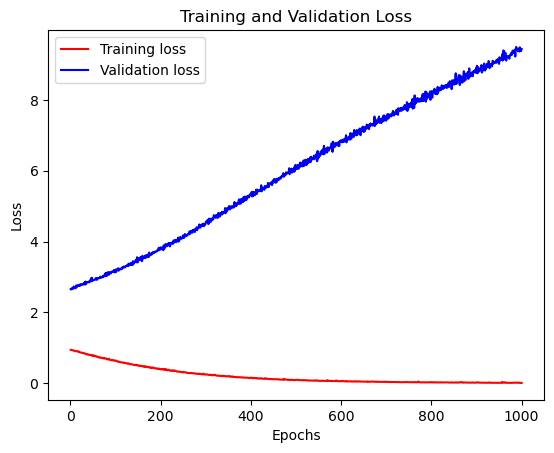

In [157]:
training_loss = best_cnn_history.history["loss"]
validation_loss = best_cnn_history.history["val_loss"]
epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, "r", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

### LSTM

In [119]:
model_lstm = Sequential(
    [
        LSTM(50, activation="relu", input_shape=(X_train_scaled.shape[1], 1)),
        Dense(10, activation="softmax"),
    ]
)

model_lstm.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)


history_lstm = model_lstm.fit(
    X_train_scaled,
    y_train_m_ohe,
    epochs=10,
    validation_data=(X_val_scaled, y_val_m_ohe),
)

predictions_lstm = model_lstm.predict(X_val_scaled)
accuracy_lstm = accuracy_score(
    y_val_m_ohe.argmax(axis=1), predictions_lstm.argmax(axis=1)
)
f1_lstm = f1_score(
    y_val_m_ohe.argmax(axis=1), predictions_lstm.argmax(axis=1), average="weighted"
)

print(f"Accuracy (LSTM): {accuracy_lstm}")
print(f"F1 Score (LSTM): {f1_lstm}")

Epoch 1/10
22/22 [==============================] - 1s 11ms/step - loss: 2.2829 - accuracy: 0.1439 - val_loss: 2.2073 - val_accuracy: 0.3081
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 32.0813 - accuracy: 0.1948 - val_loss: 2.1403 - val_accuracy: 0.3081
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 189.5430 - accuracy: 0.1933 - val_loss: 2.1348 - val_accuracy: 0.3081
Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 2.2179 - accuracy: 0.2006 - val_loss: 2.1500 - val_accuracy: 0.3081
Epoch 5/10
22/22 [==============================] - 0s 7ms/step - loss: 2.2159 - accuracy: 0.2006 - val_loss: 2.1407 - val_accuracy: 0.3081
Epoch 6/10
22/22 [==============================] - 0s 7ms/step - loss: 2.2108 - accuracy: 0.1991 - val_loss: 2.1317 - val_accuracy: 0.3198
Epoch 7/10
22/22 [==============================] - 0s 7ms/step - loss: 2.2062 - accuracy: 0.2108 - val_loss: 2.1224 - val_accuracy: 0.3198
Epoch 8/10
22/22